In [19]:
# Source: Alexandru Tifrea and Fanny Yang, 2022.

# Python Notebook Commands
%reload_ext autoreload
%autoreload 2

from IPython.core.display import HTML
from IPython.display import display
display(HTML("<style>.container { width:100% !important; }</style>"))

import ast
from copy import deepcopy
import numpy as np
import time
import pickle
import re
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
plotly.offline.init_notebook_mode()

import csv

import ipywidgets
from ipywidgets import interact

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import datasets

# General math and plotting modules.
import numpy as np

from sklearn.calibration import calibration_curve

# Change these values if the images don't fit for your screen.
figure_width = 1600
figure_height = 600

In [20]:
data_stats = {}
with open('dataset_UL_train_error.txt', "r") as f:
    reader = csv.reader(f, delimiter=' ')
    for i, row in enumerate(reader):
        if i == 0 or row[0] == "jasmine":
            continue
        data_stats[row[0]] = [float(row[1]), float(row[2]), int(row[4]), 0]
        item = data_stats[row[0]]
        d_vs_n = min(1/np.sqrt(item[2]), 1)
        data_stats[row[0]][3] = (1-item[0] / item[1]) * d_vs_n if item[1] > 0.11 else item[0]
#         data_stats[row[0]][3] = (1-item[0] / item[1]) / item[2] if item[1] > 0.1 else item[1]
# data_stats = dict(sorted(data_stats.items(), key=lambda item: -item[1][0] / np.sqrt(item[1][2])))
# data_stats = dict(sorted(data_stats.items(), key=lambda item: -item[1][0]))
# data_stats = dict(sorted(data_stats.items(), key=lambda item: -item[1][1]))
data_stats = dict(sorted(data_stats.items(), key=lambda item: -item[1][3]))


In [21]:
pd.DataFrame.from_dict(data_stats)

musk       nomao  mnist_3v8  SantanderCustomerSatisfaction  \
0    0.037436    0.049703   0.042961                       0.085495   
1    0.270233    0.147541   0.105972                       0.215975   
2  166.000000  118.000000  20.000000                     200.000000   
3    0.066863    0.061046   0.042961                       0.042719   

          a9a  mnist_5v6  mnist_5v9  vehicleNorm  philippine  mnist_1v7  \
0    0.150076   0.024869   0.024565     0.141533    0.240398   0.006065   
1    0.216187   0.042535   0.045739     0.177036    0.318930   0.036915   
2  123.000000  20.000000  20.000000   100.000000  308.000000  20.000000   
3    0.027574   0.024869   0.024565     0.020054    0.014031   0.006065   

     madeline  mnist_0v1  
0    0.344586   0.001421  
1    0.381847   0.009066  
2  259.000000  20.000000  
3    0.006063   0.001421

In [39]:
# all_filenames = {
#     "a9a": "a9a_NoneD_1683784055.csv"","
# #     "jasmine": "jasmine_NoneD_1683784089.csv"","
#     "madeline": "madeline_NoneD_1683784063.csv"","
#     "mnist_0v1": "mnist_0v1_20D_1683783372.csv"","
#     "mnist_1v7": "mnist_1v7_20D_1683783598.csv"","
#     "mnist_3v8": "mnist_3v8_20D_1683783785.csv"","
#     "mnist_5v6": "mnist_5v6_20D_1683783790.csv"","
#     "mnist_5v9": "mnist_5v9_20D_1683783765.csv"","
#     "musk": "musk_NoneD_1683784239.csv"","
#     "philippine": "philippine_NoneD_1683784323.csv"","
#     "vehicleNorm": "vehicleNorm_NoneD_1683784097.csv"","
# }
all_filenames = {}
# curr_files = {}
# files_UvL5 = "a9a_NoneD_UvL5_1683786624.csv","madeline_NoneD_UvL5_1683786631.csv","mnist_0v1_20D_UvL5_1683786209.csv","mnist_1v7_20D_UvL5_1683786325.csv","mnist_3v8_20D_UvL5_1683786403.csv","mnist_5v6_20D_UvL5_1683786413.csv","mnist_5v9_20D_UvL5_1683786385.csv","musk_NoneD_UvL5_1683786715.csv","philippine_NoneD_UvL5_1683786759.csv","vehicleNorm_NoneD_UvL5_1683786618.csv".split("","")
# for i"," d in enumerate(data_stats.keys()):
#     corr_f = None
#     for f in files_UvL5:
#         if f.startswith(d):
#             corr_f = f
#             break
#     if corr_f is not None:
#         curr_files[d] = corr_f
# all_filenames[5] = curr_files

# curr_files = {}
# files_UvL10 = "a9a_NoneD_UvL10_1683789341.csv","jasmine_NoneD_UvL10_1683789350.csv","madeline_NoneD_UvL10_1683789362.csv","mnist_0v1_20D_UvL10_1683788951.csv","mnist_1v7_20D_UvL10_1683789083.csv","mnist_3v8_20D_UvL10_1683789163.csv","mnist_5v6_20D_UvL10_1683789145.csv","mnist_5v9_20D_UvL10_1683789148.csv","musk_NoneD_UvL10_1683789439.csv","philippine_NoneD_UvL10_1683789471.csv","vehicleNorm_NoneD_UvL10_1683789343.csv".split("","")
# for i, d in enumerate(data_stats.keys()):
#     corr_f = None
#     for f in files_UvL10:
#         if f.startswith(d):
#             corr_f = f
#             break
#     if corr_f is not None:
#         curr_files[d] = corr_f
# all_filenames[10] = curr_files

curr_files = {}
# files_UvL20 = ['a9a_NoneD_1683784055.csv','jasmine_NoneD_1683784089.csv','madeline_NoneD_1683784063.csv','mnist_0v1_20D_1683783372.csv','mnist_1v7_20D_1683783598.csv','mnist_3v8_20D_1683783785.csv','mnist_5v6_20D_1683783790.csv','mnist_5v9_20D_1683783765.csv','musk_NoneD_1683784239.csv','philippine_NoneD_1683784323.csv','vehicleNorm_NoneD_1683784097.csv']
files_UvL20 = ["a9a_NoneD_UvL20_1691020257.csv","jasmine_NoneD_UvL20_1691019317.csv","madeline_NoneD_UvL20_1691019447.csv","mnist_0v1_20D_UvL20_1691018104.csv","mnist_1v7_20D_UvL20_1691018539.csv","mnist_3v8_20D_UvL20_1691018831.csv","mnist_5v6_20D_UvL20_1691018881.csv","mnist_5v9_20D_UvL20_1691018818.csv","musk_NoneD_UvL20_1691020061.csv","philippine_NoneD_UvL20_1691020218.csv","vehicleNorm_NoneD_UvL20_1691020595.csv"]
for i, d in enumerate(data_stats.keys()):
    corr_f = None
    for f in files_UvL20:
        if f.startswith(d):
            corr_f = f
            break
    if corr_f is not None:
        curr_files[d] = corr_f
all_filenames[20] = curr_files

In [40]:
all_filenames

{20: {'musk': 'musk_NoneD_UvL20_1691020061.csv',
  'mnist_3v8': 'mnist_3v8_20D_UvL20_1691018831.csv',
  'a9a': 'a9a_NoneD_UvL20_1691020257.csv',
  'mnist_5v6': 'mnist_5v6_20D_UvL20_1691018881.csv',
  'mnist_5v9': 'mnist_5v9_20D_UvL20_1691018818.csv',
  'vehicleNorm': 'vehicleNorm_NoneD_UvL20_1691020595.csv',
  'philippine': 'philippine_NoneD_UvL20_1691020218.csv',
  'mnist_1v7': 'mnist_1v7_20D_UvL20_1691018539.csv',
  'madeline': 'madeline_NoneD_UvL20_1691019447.csv',
  'mnist_0v1': 'mnist_0v1_20D_UvL20_1691018104.csv'}}

In [43]:
UvL_ratio = 20
root_dir = "figures_unsup_val"
# root_dir = "figures"
all_runs = {}
for k in data_stats.keys():
    if k not in all_filenames[UvL_ratio]:
        continue
    with open(f'{root_dir}/{all_filenames[UvL_ratio][k]}', "r") as f:
#     with open(f'{root_dir}/{all_filenames[k]}', "r") as f:
        reader = csv.reader(f, delimiter=',')
        curr_run_info = {}
        for i, row in enumerate(reader):
            try:
                curr_run_info[row[0]] = ast.literal_eval(row[1])
            except:
                pass
        curr_run_info["sl_diff_acc"] = np.array(curr_run_info["sl_diff_acc"]).reshape((curr_run_info["num_repetitions"], -1))
        curr_run_info["ul_diff_acc"] = np.array(curr_run_info["ul_diff_acc"]).reshape((curr_run_info["num_repetitions"], -1))
        curr_run_info["st_diff_acc"] = np.array(curr_run_info["st_diff_acc"]).reshape((curr_run_info["num_repetitions"], -1))
            
        curr_run_info["avg_sl_acc"] = np.array(curr_run_info["sl_acc"]).reshape((curr_run_info["num_repetitions"], -1)).mean(axis=0)
        curr_run_info["avg_ssl_acc"] = np.array(curr_run_info["ssl_acc"]).reshape((curr_run_info["num_repetitions"], -1)).mean(axis=0)
        curr_run_info["avg_ul_acc"] = np.array(curr_run_info["ul_acc"]).reshape((curr_run_info["num_repetitions"], -1)).mean(axis=0)
        curr_run_info["avg_st_acc"] = np.array(curr_run_info["st_acc"]).reshape((curr_run_info["num_repetitions"], -1)).mean(axis=0)
        all_runs[k] = curr_run_info

In [44]:
EPSILON = 0.75
for k in data_stats.keys():
    if k not in all_runs:
        continue
    acc_threshold = EPSILON * (1 - data_stats[k][0])
    run_info = all_runs[k]
    all_runs[k]["selected_idx"] = -1  
    for i, sl_acc in enumerate(run_info["avg_sl_acc"]):
        if sl_acc >= acc_threshold:
            all_runs[k]["selected_idx"] = i
            break

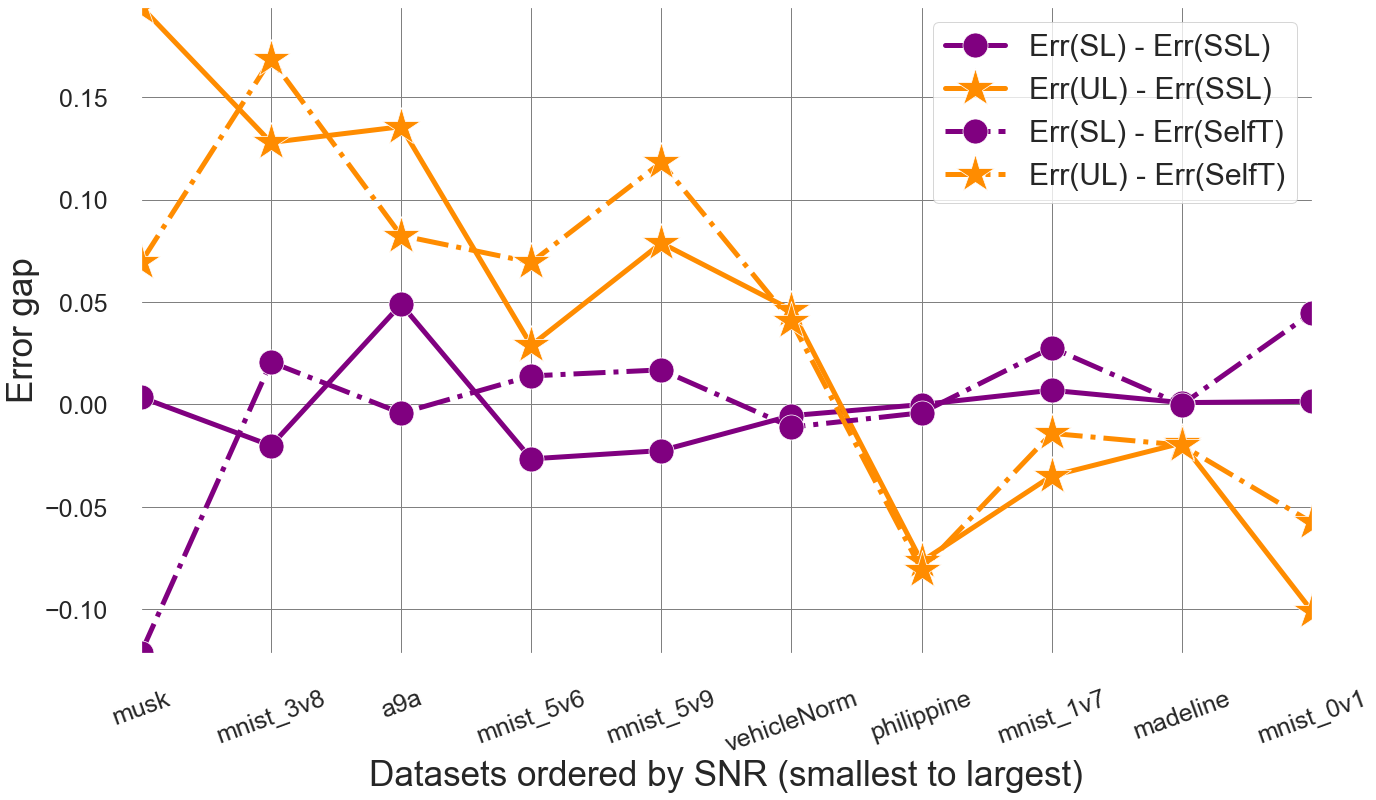

In [55]:
sl_diffs, ul_diffs, st_diffs, st_vs_sl_diffs, st_vs_ul_diffs = {}, {}, {}, {}, {}
for k in data_stats.keys():
    if k not in all_runs:
        continue
#     sl_diffs[k] = all_runs[k]["sl_diff_acc"].mean(axis=0)[all_runs[k]["selected_idx"]]# / (1 - all_runs[k]["ssl_acc"][all_runs[k]["selected_idx"]])
#     ul_diffs[k] = all_runs[k]["ul_diff_acc"].mean(axis=0)[all_runs[k]["selected_idx"]]# / (1 - all_runs[k]["ssl_acc"][all_runs[k]["selected_idx"]])
    sl_diffs[k] = (np.array(all_runs[k]["ssl_acc_unl_val"]) - np.array(all_runs[k]["sl_acc"])).reshape(all_runs[k]["num_repetitions"], -1).mean(axis=0)[all_runs[k]["selected_idx"]]# / (1 - all_runs[k]["ssl_acc"][all_runs[k]["selected_idx"]])
    ul_diffs[k] = (np.array(all_runs[k]["ssl_acc_unl_val"]) - np.array(all_runs[k]["ul_acc"])).reshape(all_runs[k]["num_repetitions"], -1).mean(axis=0)[all_runs[k]["selected_idx"]]# / (1 - all_runs[k]["ssl_acc"][all_runs[k]["selected_idx"]])
    
    
    st_diffs[k] = all_runs[k]["st_diff_acc"].mean(axis=0)[all_runs[k]["selected_idx"]]# / (1 - all_runs[k]["ssl_acc"][all_runs[k]["selected_idx"]])
    st_vs_sl_diffs[k] = (np.array(all_runs[k]["st_acc"]) - np.array(all_runs[k]["sl_acc"])).reshape(all_runs[k]["num_repetitions"], -1).mean(axis=0)[all_runs[k]["selected_idx"]]# / (1 - all_runs[k]["ssl_acc"][all_runs[k]["selected_idx"]])
    st_vs_ul_diffs[k] = (np.array(all_runs[k]["st_acc"]) - np.array(all_runs[k]["ul_acc"])).reshape(all_runs[k]["num_repetitions"], -1).mean(axis=0)[all_runs[k]["selected_idx"]]# / (1 - all_runs[k]["ssl_acc"][all_runs[k]["selected_idx"]])

# bayes_errors = np.array([v[0] for k, v in data_stats.items()])
bayes_errors = np.ones(len(all_runs))

# fig = go.Figure()
# fig.add_trace(go.Scatter(
#     x=list(sl_diffs.keys()),
#     y=np.array(list(sl_diffs.values())) / bayes_errors,
#     name="Err[SL]-Err[SSL]",
#     text=list(sl_diffs.keys()),
#     marker_color="blue",
# ))
# fig.add_trace(go.Scatter(
#     x=list(sl_diffs.keys()),
#     y=np.array(list(ul_diffs.values())) / bayes_errors,
#     name="Err[UL]-Err[SSL]",
#     text=list(ul_diffs.keys()),
#     marker_color="red",
# ))

# fig.add_trace(go.Scatter(
#     x=list(sl_diffs.keys()),
#     y=np.array(list(st_vs_sl_diffs.values())) / bayes_errors,
#     name="Err[SL]-Err[SelfT]",
#     text=list(sl_diffs.keys()),
#     marker_color="blue",
#     line_dash="dash",
# ))
# fig.add_trace(go.Scatter(
#     x=list(sl_diffs.keys()),
#     y=np.array(list(st_vs_ul_diffs.values())) / bayes_errors,
#     name="Err[UL]-Err[SelfT]",
#     text=list(sl_diffs.keys()),
#     marker_color="red",
#     line_dash="dash",
# ))

# fig.update_layout(
#   yaxis_title="Error gap",
#   xaxis_title="Datasets ordered from least to most compatible",
# )

sns.set()
fig,ax=plt.subplots(figsize=(20,12))
sns.lineplot(x=list(sl_diffs.keys()), y=np.array(list(sl_diffs.values())) / bayes_errors, label="Err(SL) - Err(SSL)", 
             marker="o", markersize=25, linewidth=5, color="purple", ax=ax)
sns.lineplot(x=list(sl_diffs.keys()), y=np.array(list(ul_diffs.values())) / bayes_errors, label="Err(UL) - Err(SSL)", 
             marker="*", markersize=40, linewidth=5, color="darkorange", ax=ax)
sns.lineplot(x=list(sl_diffs.keys()), y=np.array(list(st_vs_sl_diffs.values())) / bayes_errors, label="Err(SL) - Err(SelfT)", 
             marker="o", markersize=25, linewidth=5, color="purple", linestyle="-.", ax=ax)
sns.lineplot(x=list(sl_diffs.keys()), y=np.array(list(st_vs_ul_diffs.values())) / bayes_errors, label="Err(UL) - Err(SelfT)", 
             marker="*", markersize=40, linewidth=5, color="darkorange", linestyle="-.", ax=ax)
sns.set(font_scale=3)

ax.set_xlabel("Datasets ordered by SNR (smallest to largest)", fontsize=35)
ax.set_ylabel("Error gap", fontsize=35)
ax.tick_params(axis="x", labelsize=25, size=30, rotation=20)
ax.tick_params(axis="y", labelsize=25, size=30)
ax.legend(fontsize=30, facecolor="white")
plt.margins(0)
plt.tight_layout()

ax.set_facecolor('white')
ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='solid')


fig_name = "plot_ssl_gap_realdata_unlabeled_validation.pdf"
plt.savefig(f'/Users/alexandrutifrea/Projects/SSL_lower_bound/SSL_compatibility_lb/neurips2023/figures/{fig_name}')


In [8]:
for k in data_stats.keys():
    print(k, all_runs[k]["selected_idx"], all_runs[k]["n_labelled"][all_runs[k]["selected_idx"]])

musk 1 3
mnist_3v8 5 7
a9a 1 3
mnist_5v6 1 3
mnist_5v9 3 5
vehicleNorm 10 12
philippine 3 5
madeline 0 2
mnist_1v7 0 2
mnist_0v1 0 2


# SSL-W vs SSL-W plots

In [47]:
df=pd.DataFrame.from_dict({k: np.array(v) if type(v) == list else v.reshape(-1,) for k, v in all_runs["a9a"].items() if (k in ["n_labelled"] or k.endswith("acc")) and not k.startswith("avg")})
df

n_labelled  sl_acc  ssl_acc  ssl_val_acc  ul_acc  st_acc  sl_diff_acc  \
0             2   0.566    0.566        0.563   0.554   0.756        0.000   
1             3   0.759    0.795        0.777   0.590   0.749        0.000   
2             4   0.759    0.774        0.768   0.564   0.758        0.000   
3             5   0.759    0.778        0.773   0.564   0.758        0.000   
4             6   0.759    0.787        0.766   0.502   0.758        0.000   
..          ...     ...      ...          ...     ...     ...          ...   
895          42   0.776    0.782        0.788   0.566   0.776        0.000   
896          43   0.774    0.774        0.756   0.539   0.771       -0.003   
897          44   0.774    0.774        0.758   0.487   0.774        0.000   
898          45   0.775    0.779        0.770   0.472   0.772        0.000   
899          46   0.775    0.775        0.757   0.611   0.776       -0.001   

     ul_diff_acc  st_diff_acc  
0          0.012       -0.190  
1          0.169        0.010  
2          0.195        0.001  
3          0.195        0.001  
4          0.257        0.001  
..           ...          ...  
895        0.210        0.000  
896        0.232        0.000  
897        0.287        0.000  
898        0.303        0.003  
899        0.163       -0.002  

[900 rows x 9 columns]

In [48]:
all_runs[d]["switch_acc"] = np.maximum(np.array(all_runs[d]["sl_acc"]), np.array(all_runs[d]["ul_acc"]))
all_runs[d]["switch_diff_acc"] = (np.array(all_runs[d]["ssl_acc"]) - np.array(all_runs[d]["switch_acc"]))

In [49]:
np.array(all_runs["musk"]["switch_diff_acc"]).reshape((45, -1))[::5].reshape(-1).shape

KeyError: 'switch_diff_acc'

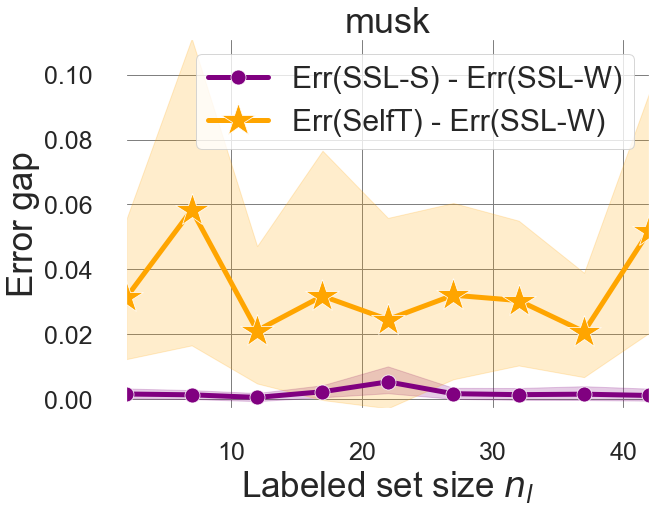

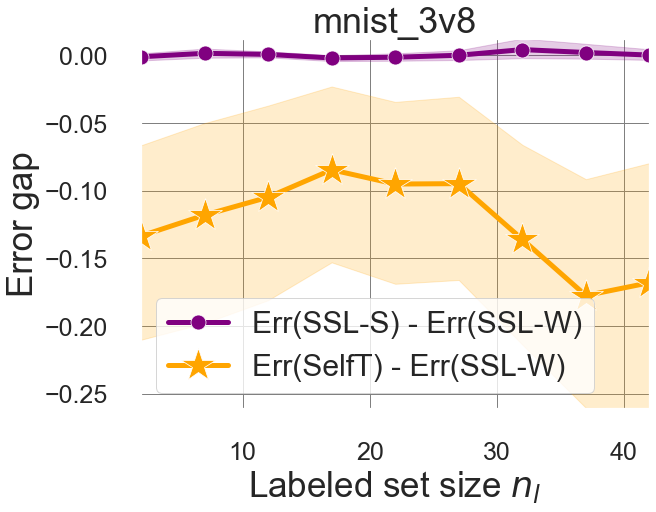

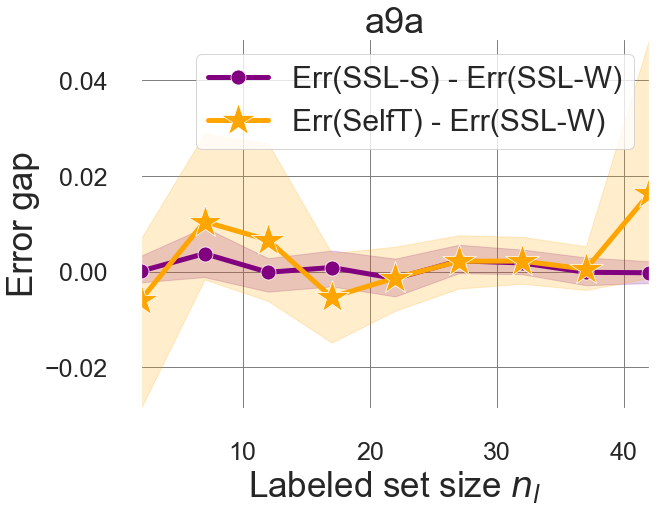

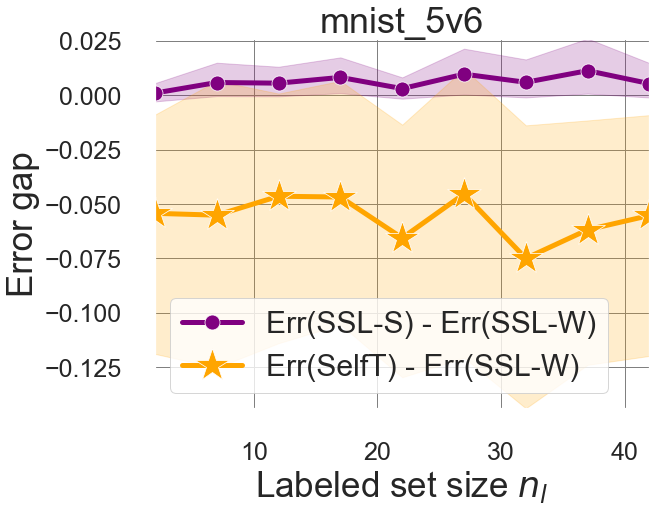

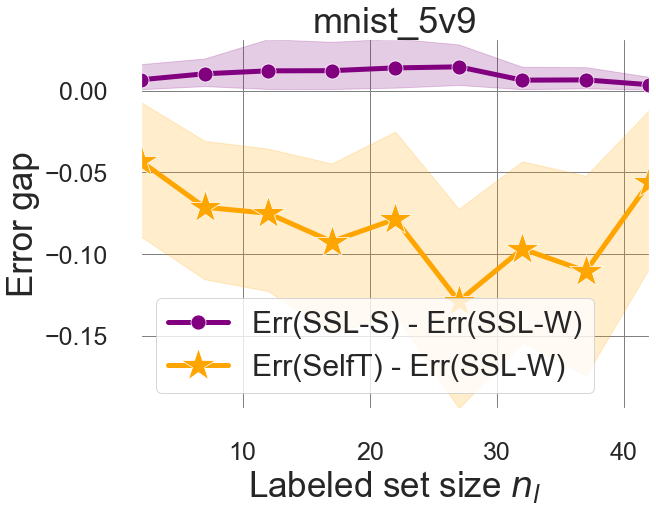

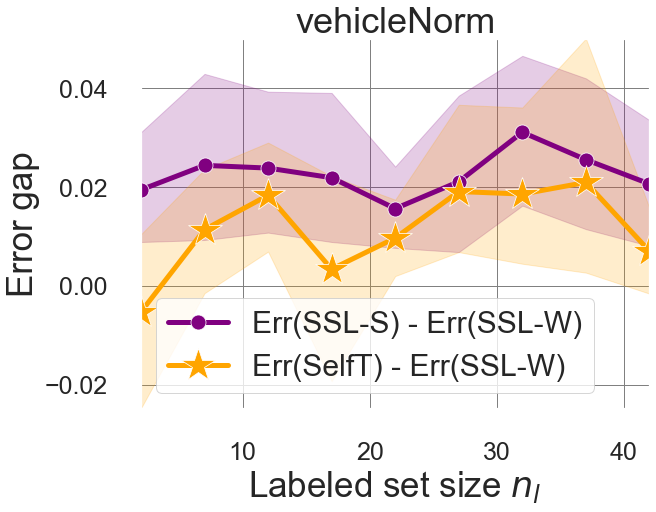

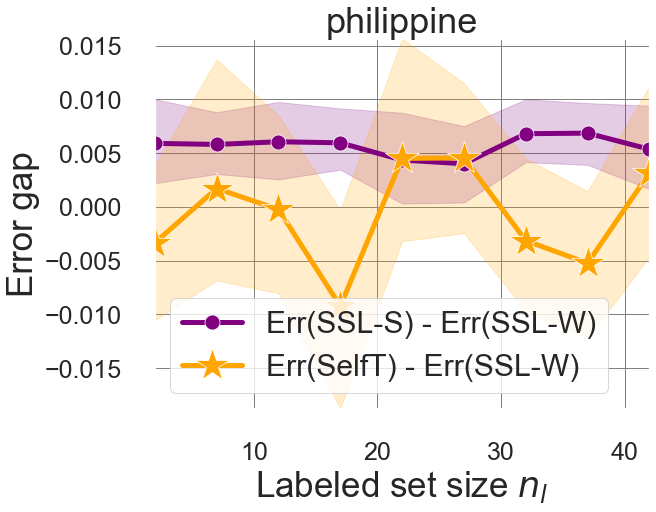

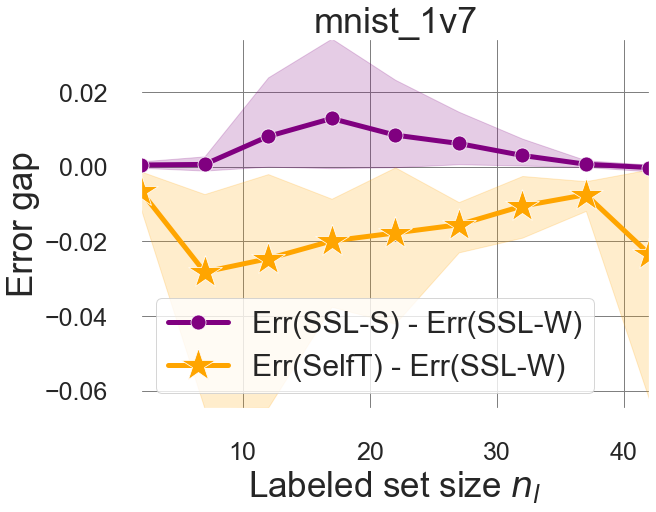

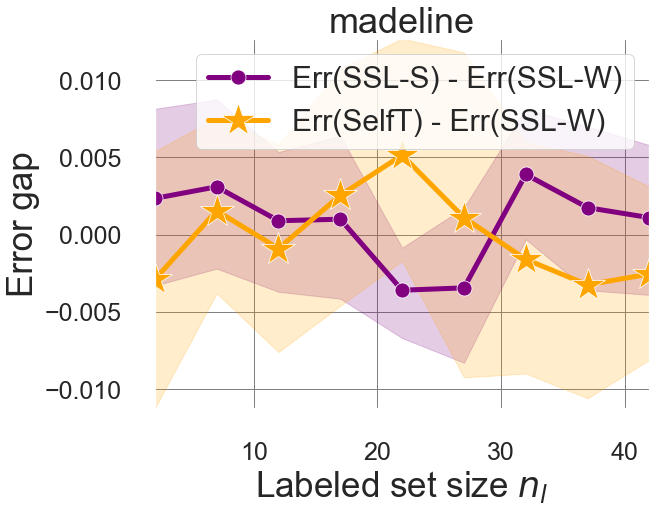

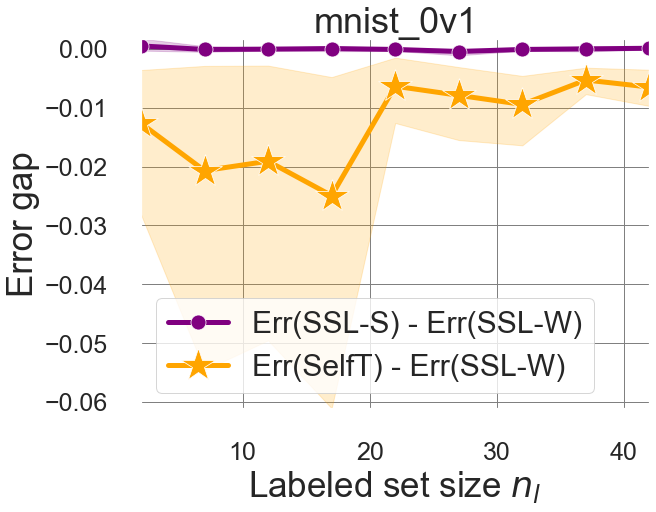

In [54]:
is_appendix = True
for d in data_stats.keys():
#     if d != "mnist_5v9":
#         continue
    if d not in all_runs:
        continue
    
    
    all_runs[d]["switch_acc"] = np.maximum(np.array(all_runs[d]["sl_acc"]), np.array(all_runs[d]["ul_acc"]))
    all_runs[d]["switch_diff_acc"] = (np.array(all_runs[d]["ssl_acc"]) - np.array(all_runs[d]["switch_acc"]))    
    
#     x = list(np.array(all_runs[d]["n_labelled"]).reshape(all_runs[d]["num_repetitions"], -1).mean(axis=0))
#     y = all_runs[d]["switch_diff_acc"].reshape(all_runs[d]["num_repetitions"], -1).mean(axis=0)
#     y_lower = y - np.percentile(all_runs[d]["switch_diff_acc"].reshape(all_runs[d]["num_repetitions"], -1), q=95, axis=0)
#     y_upper = y + np.percentile(all_runs[d]["switch_diff_acc"].reshape(all_runs[d]["num_repetitions"], -1), q=95, axis=0)
#     fig = go.Figure()
#     fig.add_trace(go.Scatter(
#         x=x,
#         y=y,
#         name="SSL-W vs SSL-S",
#         mode='lines',
#         line_color="blue",
#     ))
#     fig.add_trace(go.Scatter(
#         x=x+x[::-1], # x, then x reversed
#         y=list(y_upper)+list(y_lower)[::-1], # upper, then lower reversed
#         fill='toself',
#         fillcolor='blue',
#         line=dict(color='rgba(255,255,255,0)'),
#         hoverinfo="skip",
#         opacity=0.5,
#         showlegend=False
#     ))
    
#     y = all_runs[d]["st_diff_acc"].reshape(all_runs[d]["num_repetitions"], -1).mean(axis=0)
#     y_lower = y - all_runs[d]["st_diff_acc"].reshape(all_runs[d]["num_repetitions"], -1).std(axis=0)
#     y_upper = y + all_runs[d]["st_diff_acc"].reshape(all_runs[d]["num_repetitions"], -1).std(axis=0)
#     fig.add_trace(go.Scatter(
#         x=x,
#         y=y,
#         name="SSL-W vs SelfT",
#         mode='lines',
#         line_color="darkorange",
#     ))
#     fig.add_trace(go.Scatter(
#         x=x+x[::-1], # x, then x reversed
#         y=list(y_upper)+list(y_lower)[::-1], # upper, then lower reversed
#         fill='toself',
#         fillcolor='orange',
#         line=dict(color='rgba(255,255,255,0)'),
#         hoverinfo="skip",
#         opacity=0.5,
#         showlegend=False
#     ))
#     fig.show()
    
    sample_freq = 5
    x_og_size = np.unique(all_runs[d]["n_labelled"]).shape[0]
    
    df=pd.DataFrame.from_dict({
        k: np.array(v)[::sample_freq] if type(v) == list else v.reshape((x_og_size, -1))[::sample_freq].reshape(-1) for k, v in all_runs[d].items() if (k in ["n_labelled"] or k.endswith("acc")) and not k.startswith("avg")})
    sns.set()
    fig,ax=plt.subplots(figsize=(10,8))
    sns.lineplot(data=df, x='n_labelled', y='switch_diff_acc',ax=ax, label='Err(SSL-S) - Err(SSL-W)',
                 marker="o", markersize=15, color="purple", linewidth=5)
    sns.lineplot(data=df, x='n_labelled', y='st_diff_acc',ax=ax, label='Err(SelfT) - Err(SSL-W)',
                 marker="*", markersize=35, color="orange", linewidth=5)
    sns.set(font_scale=3)

    if d == "mnist_5v9":
        ax.set_ylim([-0.025, 0.08])
    if d == "philippine":
        ax.set_ylim([0.015, 0.12])
    ax.autoscale()
    
    if is_appendix:
        ax.set_title(f"{d}")
    ax.set_xlabel("Labeled set size $n_l$", fontsize=35)
    ax.set_ylabel("Error gap", fontsize=35)
    ax.tick_params(axis="x", labelsize=25, size=30)
    ax.tick_params(axis="y", labelsize=25, size=30)
    ax.legend(fontsize=30, facecolor="w")
    plt.margins(0)
    plt.tight_layout()

    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    plt.grid(color='gray', linestyle='solid')
    
    
#     plt.savefig(f'/Users/alexandrutifrea/Projects/SSL_lower_bound/SSL_compatibility_lb/neurips2023/figures/{"app_" if is_appendix else ""}ssl_weighted_vs_switch_{d}.pdf')


# Teaser plot

In [131]:
D = 5
THETA = np.ones(D)/np.sqrt(D)

def create_dataset_symmetric_mixture (theta = THETA, d=D, n_1_unl=1000, n_2_unl=1000, n_1_labeled=10, n_2_labeled=10, sigma_1=1, sigma_2=1, seed=0):
  
  np.random.seed(seed)

  n_1 = n_1_unl + n_1_labeled
  n_2 = n_2_unl + n_2_labeled

  mu_1 =  theta
  mu_2 = - theta

  x_1 = sigma_1*np.random.randn(int(n_1), d) + mu_1[None, :]
  if n_1_labeled != 0:
    x_1_labeled = x_1[:n_1_labeled,:]
  else:
    x_1_labeled = None

  x_2 = sigma_2*np.random.randn(int(n_2), d) + mu_2[None, :]
  if n_2_labeled!= 0:
    x_2_labeled = x_2[:n_2_labeled,:]
  else:
    x_2_labeled = None

  if n_1_unl != 0:
    x_unlabeled = np.append(x_1[n_1_labeled:n_1,:], x_2[n_2_labeled:n_2,:], axis=0)
  else:
    x_unlabeled = None

  return x_1_labeled, x_2_labeled, x_unlabeled

In [147]:
def plot(x_1_labeled, x_2_labeled, x_unlabeled, W_OPT= np.ones(2)/np.sqrt(2), GAMMA=None , LIM=10):
    _, ax = plt.subplots()
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-LIM, LIM)
    ax.set_ylim(-LIM, LIM)


    # opt & margin
    _x = np.linspace(-LIM, LIM, 100)
    _y = - W_OPT[0] * _x / W_OPT[1]
    ax.plot(_x, _y, c='black')

    if GAMMA is not None:
        ax.plot(_x, _y + GAMMA, c='grey')
        ax.plot(_x, _y - GAMMA, c='grey')


    ax.scatter(x_unlabeled[:, 0], x_unlabeled[:, 1], marker='.', c='black', s=100)
#     ax.scatter(x_1_labeled[:, 0],x_1_labeled[:, 1], marker='+', c='blue', s=20)
#     ax.scatter(x_2_labeled[:, 0], x_2_labeled[:, 1], marker='_', c='red', s=20)
    ax.axis('off')
    plt.show()

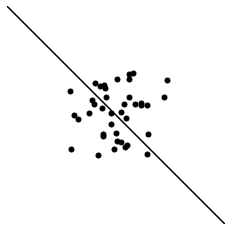

In [148]:
x_1_labeled, x_2_labeled, x_unlabeled = create_dataset_symmetric_mixture(theta=THETA, n_1_unl=20, n_2_unl=20, n_1_labeled=0, n_2_labeled=0)
plot(x_1_labeled, x_2_labeled, x_unlabeled, LIM=5)

In [180]:
def get_classification_dataset(dataset, mean=None, n_samples=200, sigma1=0.3, sigma2=0.3, d=2):
    if dataset == 'linear':
        X, Y = linear_separable_data(n_samples, mean=mean, noise=sigma1, dim=d) 
        Y = (Y + 1) // 2
    elif dataset == '2-blobs':
        X, Y = datasets.make_blobs(n_samples=n_samples, n_features=d,
                                   centers=[[0, 0], [1, 1]], cluster_std=[sigma1, sigma2], random_state=8)
    elif dataset == '3-blobs':
        X, Y = datasets.make_classification(n_classes=3, n_features=d, n_informative=2, n_redundant=0,
                                            n_clusters_per_class=1, n_samples=n_samples, random_state=8)
    elif dataset == '4-blobs':
        X, Y = datasets.make_classification(n_classes=4, n_features=d, n_informative=2, n_redundant=0,
                                            n_clusters_per_class=1, n_samples=n_samples, random_state=8) 
    elif dataset == 'circles':
        X, Y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
    elif dataset == 'moons':
        X, Y = datasets.make_moons(n_samples=n_samples, noise=.05)
    elif dataset == 'iris':
        X, Y = datasets.load_iris(return_X_y=True)
        X = X[:, :2]
    elif dataset == 'imbalanced':
        X, Y = linear_separable_data(n_samples, noise=sigma1, dim=d, num_negative=int(n_samples * 0.2))
        Y = (Y + 1) // 2

    return X, Y


def linear_separable_data(num_positive, mean=None, num_negative=None, noise=0., offset=1, dim=2):
    if num_negative is None:
        num_negative = num_positive

    if mean is None:
        mean = np.array([offset/(dim-1), offset/(dim-1)])
    else:
        mean = np.array(mean)
    
    x = mean + np.random.normal(loc=0., scale=noise, size=(num_positive, 2))
#     print(x.shape)
#     x = offset/(dim-1) + np.random.normal(loc=0., scale=noise**(dim-1), size=(num_positive, dim))
    y = 1 * np.ones((num_positive,), dtype=np.int_)

    x = np.concatenate((x, -mean + np.random.normal(loc=0., scale=noise**(dim-1),
                                            size=(num_negative, dim))), axis=0)
    y = np.concatenate((y, -1 * np.ones((num_negative,), dtype=np.int_)), axis=0)

#     x = np.concatenate((x, np.ones((num_positive + num_negative, 1))), axis=1)

    return x, y


In [181]:
X, y = get_classification_dataset(dataset="linear", n_samples=200)
X.shape

(400, 2)

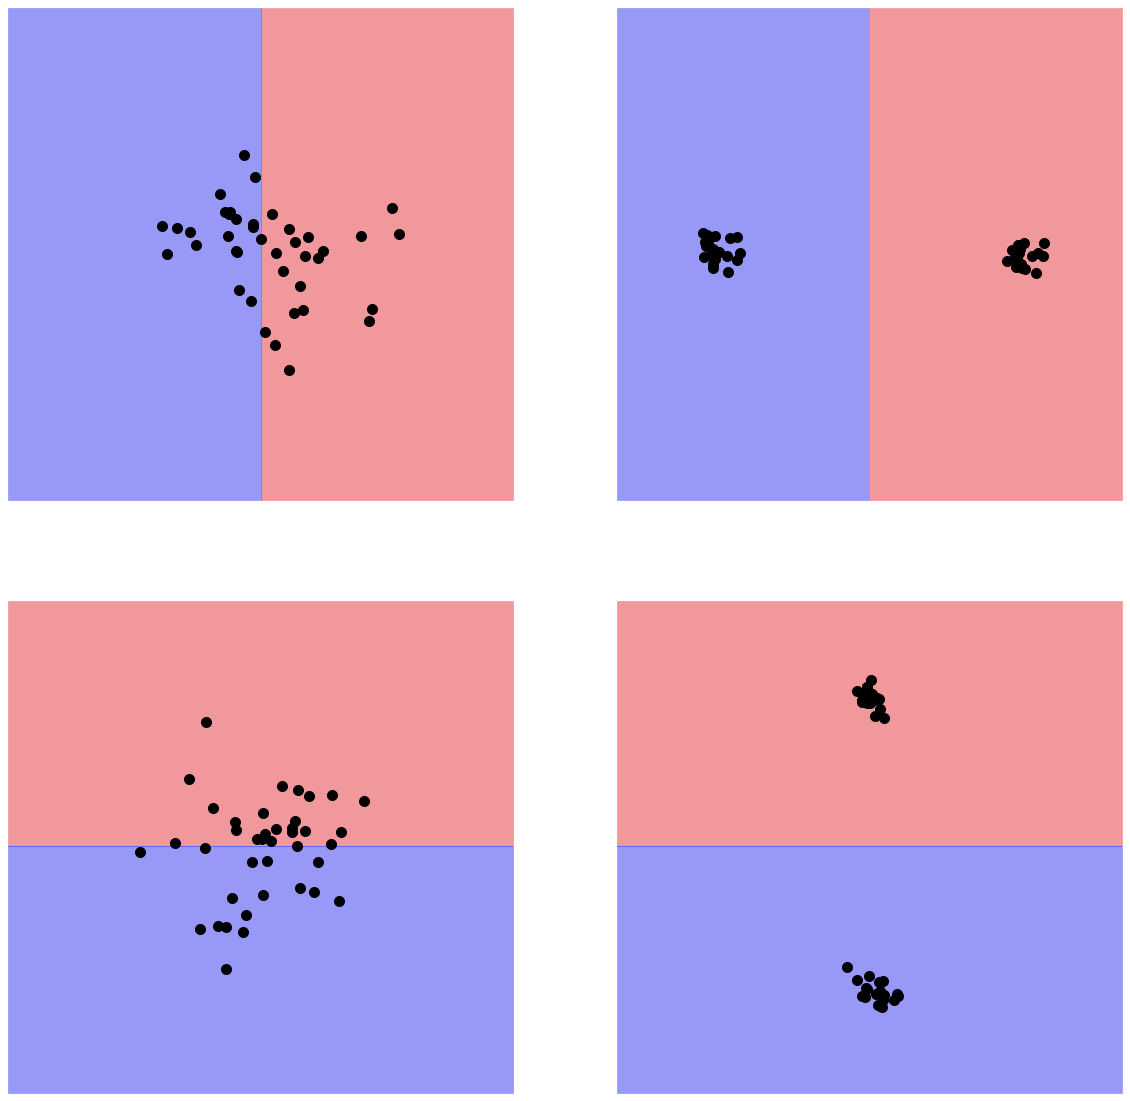

In [233]:
np.random.seed(4)

import matplotlib as mpl
from matplotlib import rcParams

def plot_panel(ax, theta, noise, n):
    X, y = get_classification_dataset(dataset="linear", n_samples=n, mean=theta, sigma1=noise)
    X = X[:, :2]

    x_min, x_max = -5, 5
    y_min, y_max = -5, 5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    xy = np.c_[xx.ravel(), yy.ravel()]
    
    # Logistic regression
    logreg = LogisticRegression()
    logreg.intercept_ = 0
    logreg.coef_ = np.array([theta])
    logreg.classes_ = np.array([0, 1])
    P = logreg.predict_proba(xy)
    maxP = P.max(axis=1)
    P = P[:, 1]
    
    cmap = (mpl.colors.ListedColormap(['blue', 'yellow', 'red']))
    bounds = [-1, 0.25, 0.75, 2]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    C = 2 * logreg.predict(xy)
    C[np.where(maxP < 0.5)[0]] = 1
#     ax.set_title('Classification with abstention')
    cf = ax.contourf(xx, yy, C.reshape(xx.shape) / 2, cmap=cmap, alpha=0.35, vmin=0, vmax=1)
    
    ax.scatter(X[:, 0], X[:, 1], color="black", s=100)
    scale = np.linalg.norm(theta)
#     ax.set_xlim(-2*scale, 2*scale)
#     ax.set_ylim(-2*scale, 2*scale)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xticks(())
    ax.set_yticks(())

rcParams['figure.figsize'] = (20,20)
rcParams['font.size'] = 20
min_prob_abstention = 0.5
asymmetric_cost_ratio = 1.

# PLOTS
fig, axes = plt.subplots(2, 2)
plot_panel(ax=axes[0][0], theta=np.array([0.5, 0]), noise=1, n=20)
plot_panel(ax=axes[1][0], theta=np.array([0, 0.5]), noise=1, n=20)
plot_panel(ax=axes[0][1], theta=np.array([3, 0]), noise=0.2, n=20)
plot_panel(ax=axes[1][1], theta=np.array([0, 3]), noise=0.2, n=20)




# # Classification with abstention.
# cmap = (mpl.colors.ListedColormap(['blue', 'yellow', 'red']))
# bounds = [-1, 0.25, 0.75, 2]
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# C = 2 * logreg.predict(xy)
# C[np.where(maxP < min_prob_abstention)[0]] = 1
# axes[0].set_title('Classification with abstention')
# cf = axes[0].contourf(xx, yy, C.reshape(xx.shape) / 2, cmap=cmap, alpha=0.35, vmin=0, vmax=1)

# # Classification with asymmetric costs.
# min_positive_prob = 1 / (1 + asymmetric_cost_ratio)
# C = 2 * logreg.predict(xy)
# C[np.where(P < min_positive_prob)[0]] = 0
# C[np.where(P >= min_positive_prob)[0]] = 1
# axes[2].set_title('Classification with asymmetric costs')
# cf = axes[2].contourf(xx, yy, C.reshape(xx.shape), cmap=plt.cm.bwr, alpha=0.35, vmin=0, vmax=1)

# # Plot also the training points
# for ax in axes:
#     ax.scatter(X[:, 0], X[:, 1], color="black", s=100)

#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xticks(())
#     ax.set_yticks(())
plt.show()